# Libraries Required

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import datetime

# Import Dataset

In [2]:
dataframe_Jan22 = pd.read_csv('202201-bluebikes-tripdata.csv')
dataframe_Feb22 = pd.read_csv('202202-bluebikes-tripdata.csv')
dataframe_Mar22 = pd.read_csv('202203-bluebikes-tripdata.csv')
dataframe_Apr22 = pd.read_csv('202204-bluebikes-tripdata.csv')
dataframe_May22 = pd.read_csv('202205-bluebikes-tripdata.csv')
dataframe_Jun22 = pd.read_csv('202206-bluebikes-tripdata.csv')
dataframe_Jul22 = pd.read_csv('202207-bluebikes-tripdata.csv')
dataframe_Aug22 = pd.read_csv('202208-bluebikes-tripdata.csv')
dataframe_Sep22 = pd.read_csv('202209-bluebikes-tripdata.csv')
dataframe_Oct22 = pd.read_csv('202210-bluebikes-tripdata.csv')
dataframe_Nov22 = pd.read_csv('202211-bluebikes-tripdata.csv')
dataframe_Dec22 = pd.read_csv('202212-bluebikes-tripdata.csv')

In [3]:
dataframe_stations = pd.read_csv('current_bluebikes_stations.csv')

# Data Cleansing

In [4]:
#Union all 2022 data
dataframe_2022 = pd.concat([dataframe_Jan22, dataframe_Feb22, dataframe_Mar22, dataframe_Apr22, dataframe_May22, dataframe_Jun22, dataframe_Jul22, dataframe_Aug22, dataframe_Sep22, dataframe_Oct22, dataframe_Nov22, dataframe_Dec22], ignore_index=True)
print(dataframe_2022.columns)
print(dataframe_2022.dtypes)

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'postal code'],
      dtype='object')
tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
postal code                 object
dtype: object


In [5]:
#Convert started_at and ended_at to datetimes
dataframe_2022['starttime']= pd.to_datetime(dataframe_2022['starttime'])
dataframe_2022['stoptime']= pd.to_datetime(dataframe_2022['stoptime'])

In [6]:
print(dataframe_2022.dtypes)
dataframe_2022.head()

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
postal code                        object
dtype: object


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code
0,597,2022-01-01 00:00:25.166,2022-01-01 00:10:22.192,178,MIT Pacific St at Purrington St,42.359573,-71.101295,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,4923,Subscriber,02139
1,411,2022-01-01 00:00:40.430,2022-01-01 00:07:32.198,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,-71.101295,3112,Subscriber,02139
2,476,2022-01-01 00:00:54.818,2022-01-01 00:08:51.668,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,6901,Customer,02124
3,466,2022-01-01 00:01:01.608,2022-01-01 00:08:48.235,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,5214,Customer,02124
4,752,2022-01-01 00:01:06.052,2022-01-01 00:13:38.230,19,Park Dr at Buswell St,42.347241,-71.105301,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,-71.123831,2214,Subscriber,02215


In [52]:
dataframe_2022[dataframe_2022['bikeid']==].count()

tripduration                     654
starttime                        654
stoptime                         654
start station id                 654
start station name               654
start station latitude           654
start station longitude          654
end station id                   654
end station name                 654
end station latitude             654
end station longitude            654
bikeid                           654
usertype                         654
postal code                      544
month                            654
hour                             654
day_of_week                      654
day_name                         654
part_of_day                      654
Number_start_station             654
District_start_station           652
Public_start_station             654
Total docks_start_station        654
Deployment Year_start_station    654
Number_end_station               654
District_end_station             652
Public_end_station               654
T

In [7]:
#Add Month, hour, and day of the week columns
dataframe_2022['month'] = pd.DatetimeIndex(dataframe_2022['starttime']).month
dataframe_2022['hour'] = pd.DatetimeIndex(dataframe_2022['starttime']).hour
dataframe_2022['day_of_week'] = pd.DatetimeIndex(dataframe_2022['starttime']).weekday
dataframe_2022['day_name']= dataframe_2022['starttime'].dt.day_name()

                            
dataframe_2022.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code,month,hour,day_of_week,day_name
0,597,2022-01-01 00:00:25.166,2022-01-01 00:10:22.192,178,MIT Pacific St at Purrington St,42.359573,-71.101295,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,4923,Subscriber,02139,1,0,5,Saturday
1,411,2022-01-01 00:00:40.430,2022-01-01 00:07:32.198,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,-71.101295,3112,Subscriber,02139,1,0,5,Saturday
2,476,2022-01-01 00:00:54.818,2022-01-01 00:08:51.668,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,6901,Customer,02124,1,0,5,Saturday
3,466,2022-01-01 00:01:01.608,2022-01-01 00:08:48.235,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,5214,Customer,02124,1,0,5,Saturday
4,752,2022-01-01 00:01:06.052,2022-01-01 00:13:38.230,19,Park Dr at Buswell St,42.347241,-71.105301,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,-71.123831,2214,Subscriber,02215,1,0,5,Saturday


In [8]:
#Add part of day column
dataframe_2022.loc[(dataframe_2022['hour'] > 5) & (dataframe_2022['hour'] <= 12), 'part_of_day'] = 'Morning'
dataframe_2022.loc[(dataframe_2022['hour'] > 12) & (dataframe_2022['hour'] <= 17), 'part_of_day'] = 'Afternoon'
dataframe_2022.loc[(dataframe_2022['hour'] > 17) & (dataframe_2022['hour'] <= 21), 'part_of_day'] = 'Evening'
dataframe_2022.loc[(dataframe_2022['hour'] > 21) | (dataframe_2022['hour'] <= 5), 'part_of_day'] = 'Night' 

dataframe_2022.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code,month,hour,day_of_week,day_name,part_of_day
0,597,2022-01-01 00:00:25.166,2022-01-01 00:10:22.192,178,MIT Pacific St at Purrington St,42.359573,-71.101295,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,4923,Subscriber,02139,1,0,5,Saturday,Night
1,411,2022-01-01 00:00:40.430,2022-01-01 00:07:32.198,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,-71.101295,3112,Subscriber,02139,1,0,5,Saturday,Night
2,476,2022-01-01 00:00:54.818,2022-01-01 00:08:51.668,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,6901,Customer,02124,1,0,5,Saturday,Night
3,466,2022-01-01 00:01:01.608,2022-01-01 00:08:48.235,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,5214,Customer,02124,1,0,5,Saturday,Night
4,752,2022-01-01 00:01:06.052,2022-01-01 00:13:38.230,19,Park Dr at Buswell St,42.347241,-71.105301,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,-71.123831,2214,Subscriber,02215,1,0,5,Saturday,Night


In [9]:
dataframe_2022.isnull().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
postal code                465637
month                           0
hour                            0
day_of_week                     0
day_name                        0
part_of_day                     0
dtype: int64

In [10]:
dataframe_2022.shape

(3757281, 19)

In [11]:
dataframe_2022 = pd.merge(dataframe_2022, dataframe_stations, left_on='start station name', right_on='Name')

In [12]:
dataframe_2022 = pd.merge(dataframe_2022, dataframe_stations, left_on='end station name', right_on='Name')

In [13]:
dataframe_2022.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,Total docks_x,Deployment Year_x,Number_y,Name_y,Latitude_y,Longitude_y,District_y,Public_y,Total docks_y,Deployment Year_y
0,597,2022-01-01 00:00:25.166,2022-01-01 00:10:22.192,178,MIT Pacific St at Purrington St,42.359573,-71.101295,74,Harvard Square at Mass Ave/ Dunster,42.373268,...,19,2015.0,M32018,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,Cambridge,Yes,19,2012.0
1,696,2022-01-04 02:21:16.325,2022-01-04 02:32:52.857,178,MIT Pacific St at Purrington St,42.359573,-71.101295,74,Harvard Square at Mass Ave/ Dunster,42.373268,...,19,2015.0,M32018,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,Cambridge,Yes,19,2012.0


In [14]:
print(dataframe_2022.columns)

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'postal code', 'month', 'hour', 'day_of_week', 'day_name',
       'part_of_day', 'Number_x', 'Name_x', 'Latitude_x', 'Longitude_x',
       'District_x', 'Public_x', 'Total docks_x', 'Deployment Year_x',
       'Number_y', 'Name_y', 'Latitude_y', 'Longitude_y', 'District_y',
       'Public_y', 'Total docks_y', 'Deployment Year_y'],
      dtype='object')


In [19]:
dataframe_2022 = dataframe_2022.rename(columns = {'Number_x': 'Number_start_station','Total docks_x':'Total docks_start_station', 'Deployment Year_x': 'Deployment Year_start_station', 'District_x': 'District_start_station', 'Public_x':'Public_start_station', 'Number_y': 'Number_end_station', 'District_y':'District_end_station', 'Public_y': 'Public_end_station', 'Total docks_y':'Total docks_end_station', 'Deployment Year_y':'Deployment Year_end_station' }
                                      
                                      
                                      
                                      )

In [17]:
dataframe_2022 = dataframe_2022.drop(['Name_x', 'Latitude_x', 'Longitude_x', 'Name_y', 'Latitude_y', 'Longitude_y'], axis=1)

In [21]:
dataframe_2022.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'postal code', 'month', 'hour', 'day_of_week', 'day_name',
       'part_of_day', 'Number_start_station', 'District_start_station',
       'Public_start_station', 'Total docks_start_station',
       'Deployment Year_start_station', 'Number_end_station',
       'District_end_station', 'Public_end_station', 'Total docks_end_station',
       'Deployment Year_end_station'],
      dtype='object')

In [22]:
dataframe_2022.to_csv('bluebikes_2022.csv')

In [ ]:
dataframe_2022 = pd.read_csv('bluebikes_2022.csv')

# Ride Info

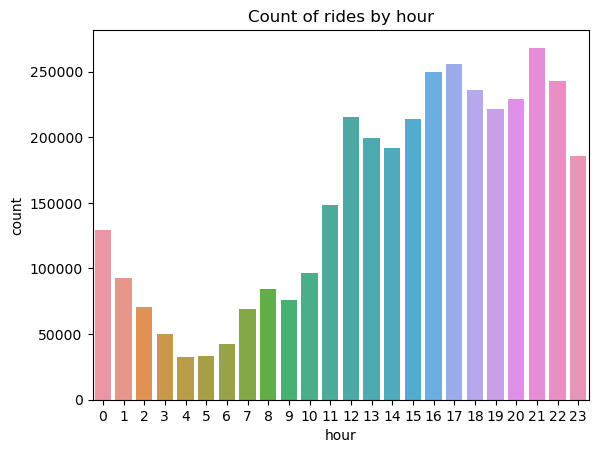

In [23]:
sns.countplot(data = dataframe_2022, x = 'hour').set(title='Count of rides by hour')
plt.show()

The plot above shows ridership increases throughout the day and is at it's highest between 15 and 22.

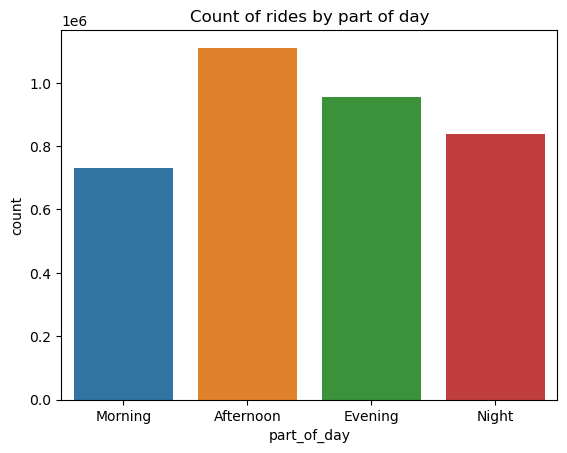

In [24]:
part_order = ['Morning', 'Afternoon', 'Evening', 'Night']
sns.countplot(data= dataframe_2022, x = 'part_of_day', order = part_order).set(title='Count of rides by part of day')
plt.show()

Most rides occur in the afternoon, followed by evening, night time, and then last Mornings. 

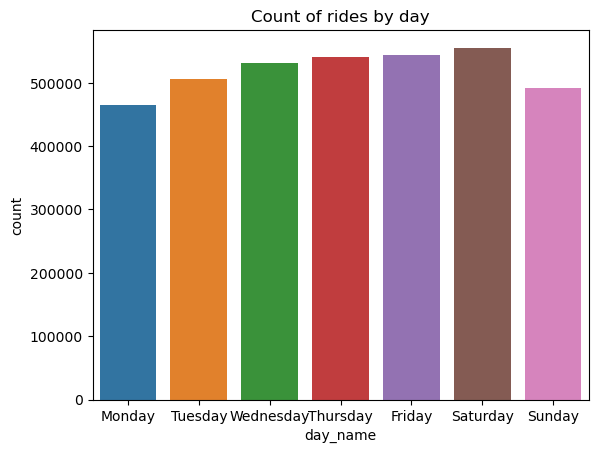

In [25]:
category_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data= dataframe_2022, x = 'day_name', order = category_order).set(title='Count of rides by day')
plt.show()

Looking at days of the week ridership is lowest on Sunday and Monday. Saturday is the most popular day.

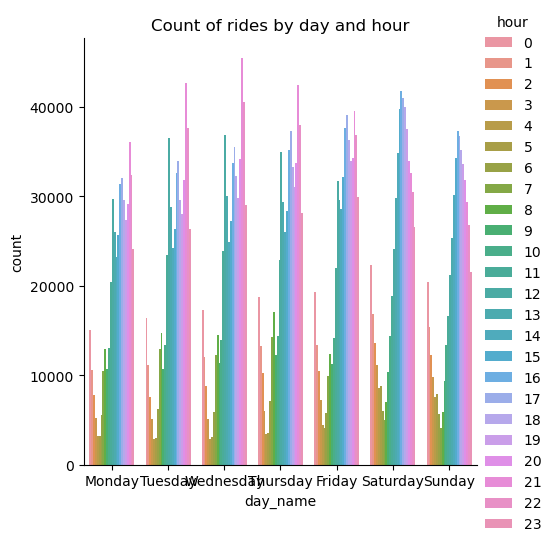

In [26]:
sns.catplot(data= dataframe_2022, x = 'day_name', kind= 'count', hue ='hour', order = category_order).set(title='Count of rides by day and hour')
plt.show()

Breaking time of rides down further the above graph shows ridership rise around 11 and then a large spike around 20 during the weekdays. On the weekends there is a small increase around midnight. The majority of rides happen between 11 and 23 on the weekends. 

# Popluar Starting Stations

In [30]:
start_station_count = dataframe_2022['start station name'].value_counts()
start_station_count_members = dataframe_2022[dataframe_2022['usertype']=='Subscriber']['start station name'].value_counts()
start_station_count_casual = dataframe_2022[dataframe_2022['usertype']=='Customer']['start station name'].value_counts()
print(start_station_count, start_station_count_members, start_station_count_casual)


MIT at Mass Ave / Amherst St                   84911
Central Square at Mass Ave / Essex St          66528
Harvard Square at Mass Ave/ Dunster            57849
MIT Pacific St at Purrington St                43942
Charles Circle - Charles St at Cambridge St    40602
                                               ...  
555 Metropolitan Ave                              75
American Legion Hwy at Hyde Park Ave              74
Goodhue St at Grove St                            53
Community Life Center                             25
North St at Liberty Hill Ave                      11
Name: start station name, Length: 444, dtype: int64 MIT at Mass Ave / Amherst St             71874
Central Square at Mass Ave / Essex St    56868
MIT Pacific St at Purrington St          41788
Harvard Square at Mass Ave/ Dunster      41308
Ames St at Main St                       33224
                                         ...  
American Legion Hwy at Hyde Park Ave        39
555 Metropolitan Ave                

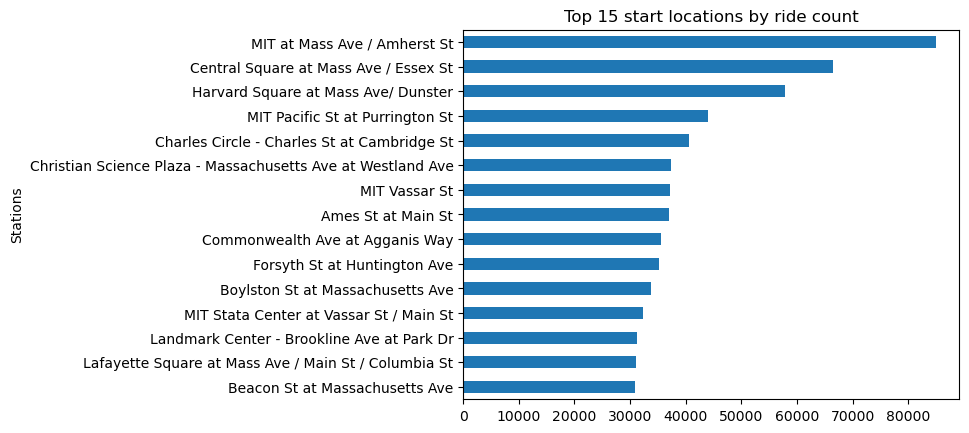

In [31]:
start_station_count.sort_values().tail(15).plot(kind='barh', title='Top 15 start locations by ride count', xlabel='Stations', ylabel='Ride count')
plt.show()

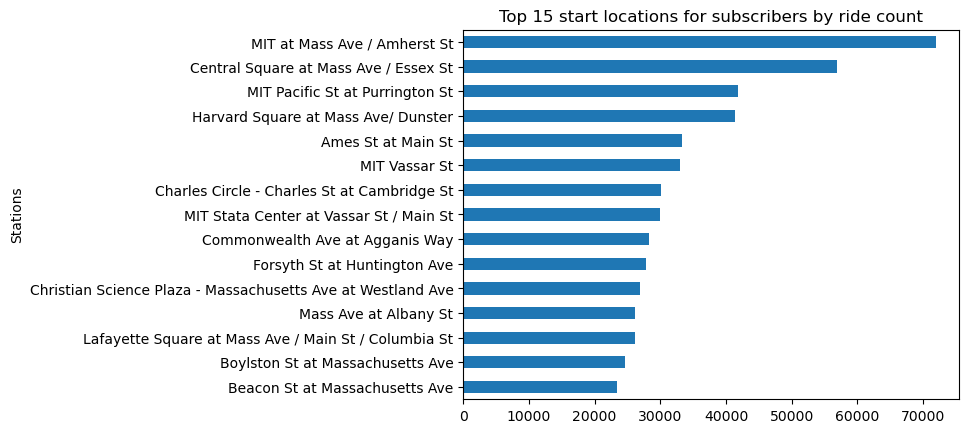

In [34]:
start_station_count_members.sort_values().tail(15).plot(kind='barh', title='Top 15 start locations for subscribers by ride count', xlabel='Stations', ylabel='Ride count')
plt.show()

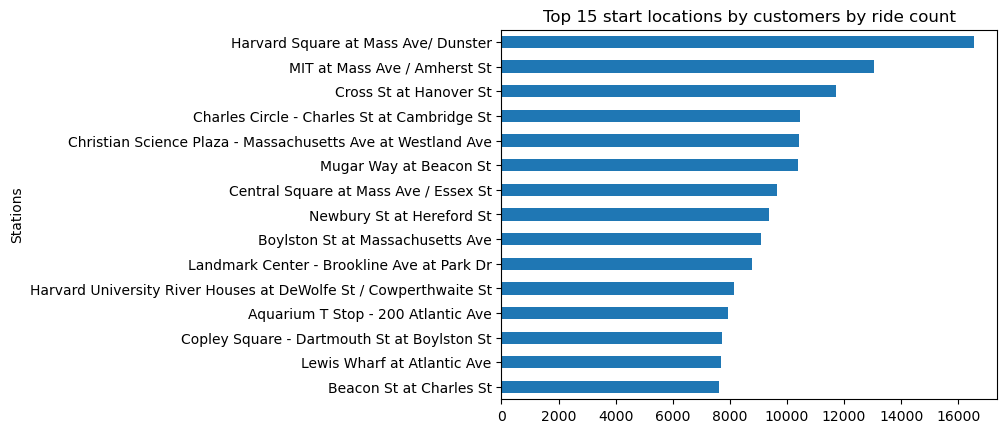

In [35]:
start_station_count_casual.sort_values().tail(15).plot(kind='barh', title='Top 15 start locations by customers by ride count', xlabel='Stations', ylabel='Ride count')
plt.show()

# Popular Ending Stations

In [37]:
end_station_count = dataframe_2022['end station name'].value_counts()
end_station_count_members = dataframe_2022[dataframe_2022['usertype']=='Subscriber']['end station name'].value_counts()
end_station_count_casual = dataframe_2022[dataframe_2022['usertype']=='Customer']['end station name'].value_counts()
print(end_station_count, end_station_count_members, end_station_count_casual)


MIT at Mass Ave / Amherst St             84654
Central Square at Mass Ave / Essex St    67053
Harvard Square at Mass Ave/ Dunster      59258
Ames St at Main St                       42358
MIT Pacific St at Purrington St          42014
                                         ...  
2 Hummingbird Lane at Olmsted Green         80
555 Metropolitan Ave                        78
Goodhue St at Grove St                      64
Community Life Center                       23
North St at Liberty Hill Ave                 7
Name: end station name, Length: 444, dtype: int64 MIT at Mass Ave / Amherst St             73203
Central Square at Mass Ave / Essex St    56876
Harvard Square at Mass Ave/ Dunster      40901
MIT Pacific St at Purrington St          40212
Ames St at Main St                       39034
                                         ...  
2 Hummingbird Lane at Olmsted Green         52
555 Metropolitan Ave                        42
Goodhue St at Grove St                      22
Community 

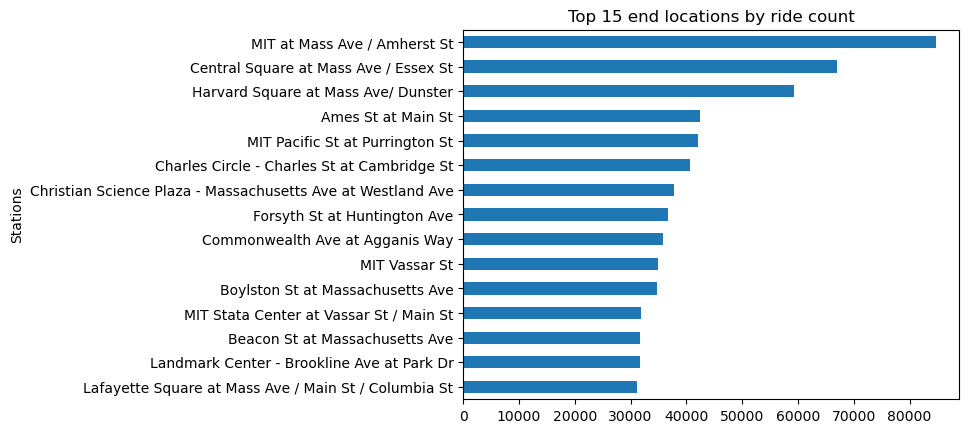

In [38]:
end_station_count.sort_values().tail(15).plot(kind='barh', title='Top 15 end locations by ride count', xlabel='Stations', ylabel='Ride count')
plt.show()

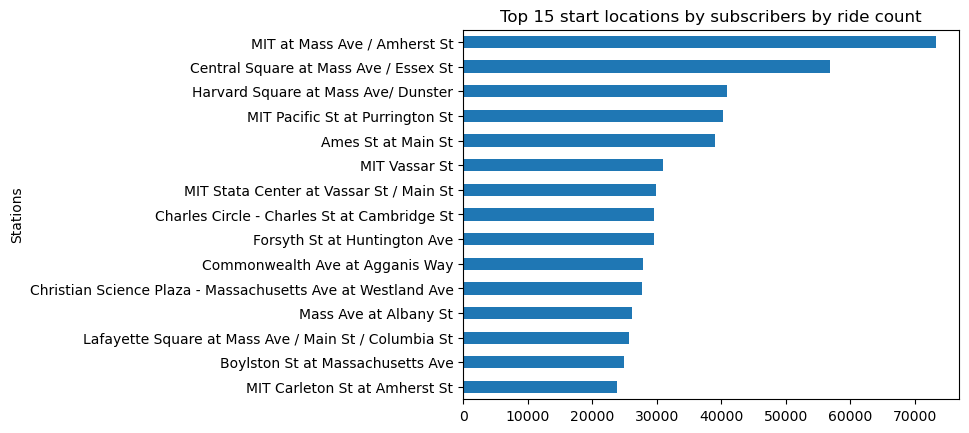

In [40]:
end_station_count_members.sort_values().tail(15).plot(kind='barh', title='Top 15 start locations by subscribers by ride count', xlabel='Stations', ylabel='Ride count')
plt.show()

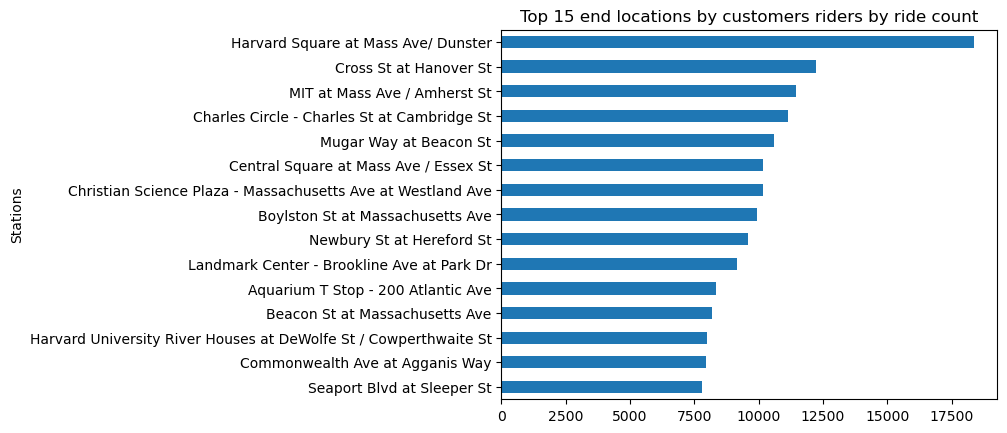

In [42]:
end_station_count_casual.sort_values().tail(15).plot(kind='barh', title='Top 15 end locations by customers riders by ride count', xlabel='Stations', ylabel='Ride count')
plt.show()

# UserType

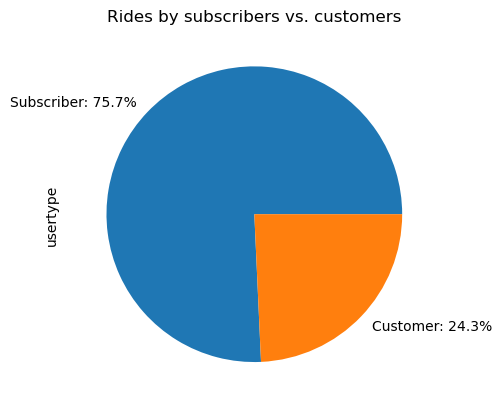

Subscriber    0.757221
Customer      0.242779
Name: usertype, dtype: float64

In [44]:
dataframe_2022.usertype.value_counts(normalize=True).plot(kind='pie', title='Rides by subscribers vs. customers', labels=['Subscriber: 75.7%', 'Customer: 24.3%'])
plt.show()
dataframe_2022.usertype.value_counts(normalize=True)

Members make up the majority of rides, this is not surprising as they are using their membership whereas casual riders pay per ride or short time period.

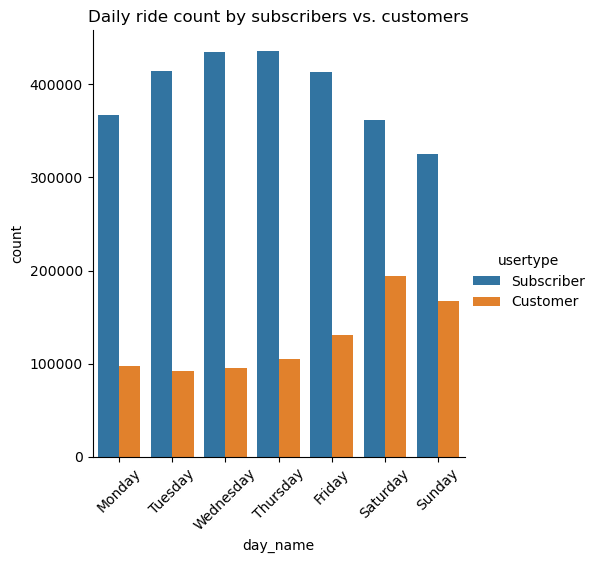

In [45]:
sns.catplot(data= dataframe_2022, x = 'day_name', kind= 'count', hue = 'usertype', order = category_order).set(title='Daily ride count by subscribers vs. customers')
plt.xticks(rotation=45)
plt.show()

Subscribers ride most during the weekdays, Customers ride most on the weekends.

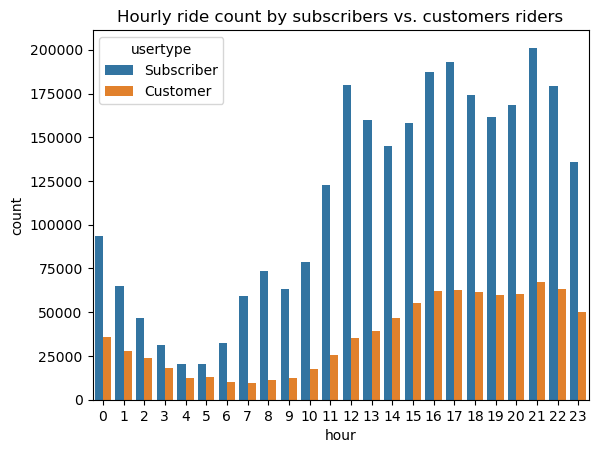

In [46]:
sns.countplot(data= dataframe_2022, x = 'hour', hue = 'usertype').set(title='Hourly ride count by subscribers vs. customers riders')
plt.show()

Subscribers ride most during lunch and evening commuting hours. Customers ride most during the afternoon/evening.

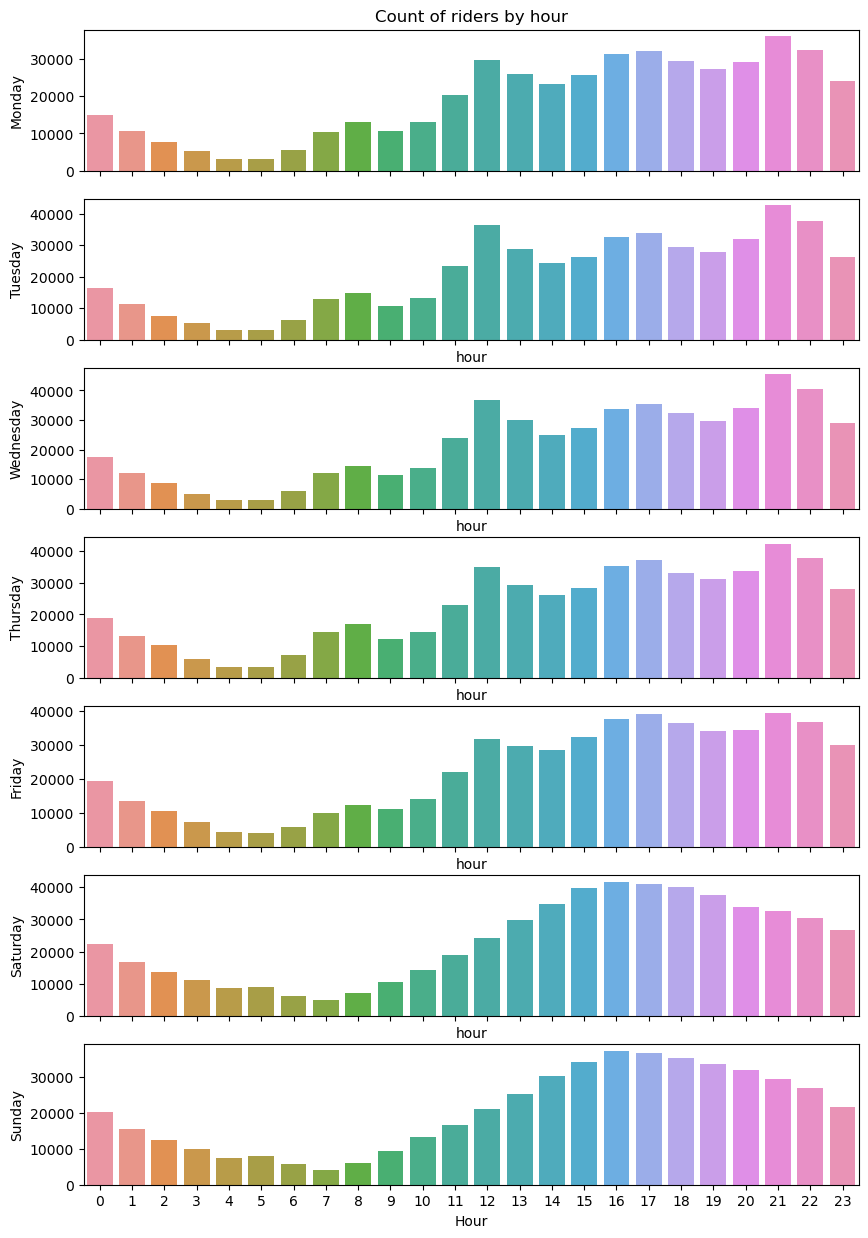

In [47]:
category_order_hours=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
monday= dataframe_2022[dataframe_2022['day_name']=='Monday']
tuesday= dataframe_2022[dataframe_2022['day_name']=='Tuesday']
wednesday= dataframe_2022[dataframe_2022['day_name']=='Wednesday']
thursday= dataframe_2022[dataframe_2022['day_name']=='Thursday']
friday= dataframe_2022[dataframe_2022['day_name']=='Friday']
saturday= dataframe_2022[dataframe_2022['day_name']=='Saturday']
sunday= dataframe_2022[dataframe_2022['day_name']=='Sunday']

fig, ax = plt.subplots(7,1, figsize= (10,15), sharex=True)
sns.countplot(ax= ax[0], x='hour', data= monday, order= category_order_hours)
ax[0].set_title('Count of riders by hour')
ax[0].set_ylabel('Monday')
ax[0].set_xlabel('')
sns.countplot(ax= ax[1], x='hour', data= tuesday, order=category_order_hours)
ax[1].set_ylabel('Tuesday')
sns.countplot(ax= ax[2], x='hour', data= wednesday, order=category_order_hours)
ax[2].set_ylabel('Wednesday')
sns.countplot(ax= ax[3], x='hour', data= thursday, order=category_order_hours)
ax[3].set_ylabel('Thursday')
sns.countplot(ax= ax[4], x='hour', data= friday, order=category_order_hours)
ax[4].set_ylabel('Friday')
sns.countplot(ax= ax[5], x='hour', data= saturday, order=category_order_hours)
ax[5].set_ylabel('Saturday')
sns.countplot(ax= ax[6], x='hour', data= sunday, order=category_order_hours)
ax[6].set_ylabel('Sunday')
ax[6].set_xlabel('Hour')
plt.show()


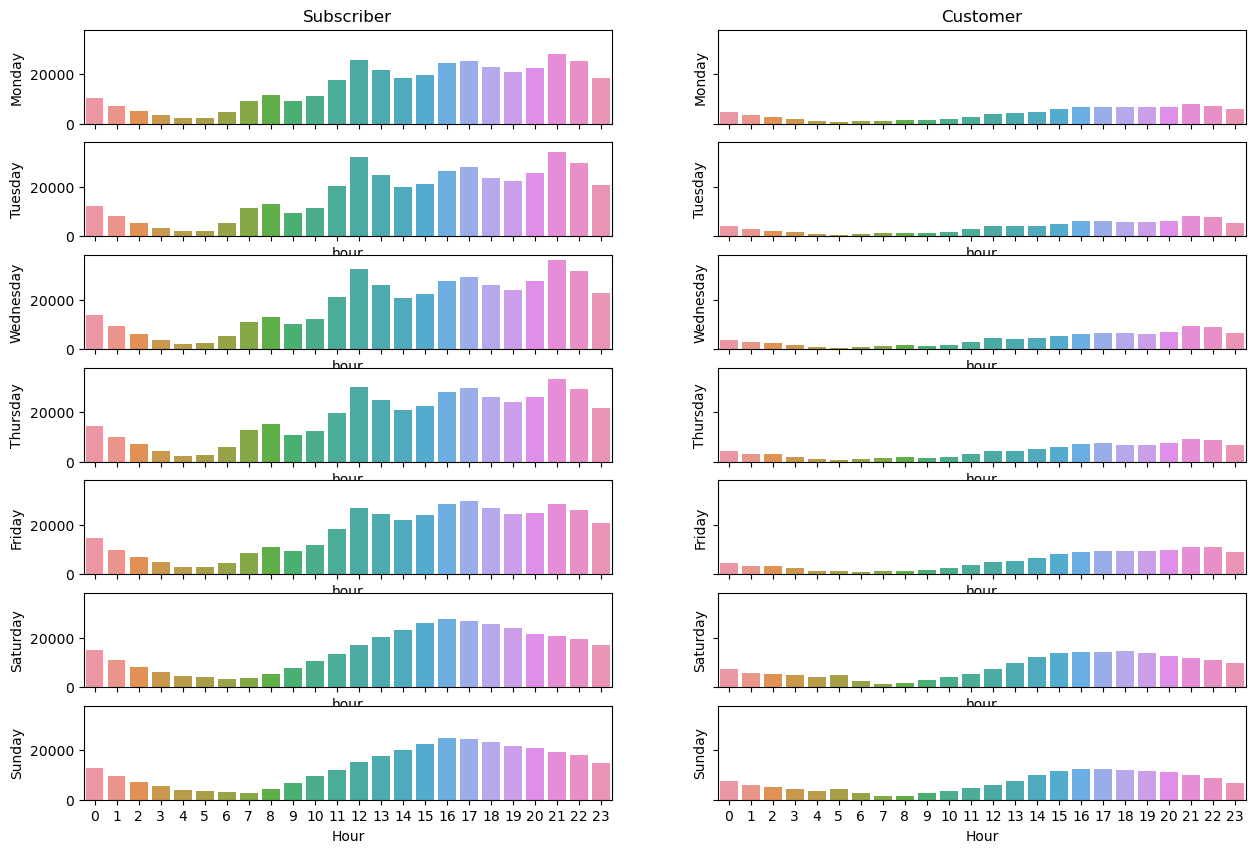

In [48]:
category_order_hours=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
monday_member= dataframe_2022[(dataframe_2022['day_name']=='Monday') & (dataframe_2022['usertype']=='Subscriber')]
monday_casual= dataframe_2022[(dataframe_2022['day_name']=='Monday') & (dataframe_2022['usertype']=='Customer')]
tuesday_member= dataframe_2022[(dataframe_2022['day_name']=='Tuesday') & (dataframe_2022['usertype']=='Subscriber')]
tuesday_casual= dataframe_2022[(dataframe_2022['day_name']=='Tuesday') & (dataframe_2022['usertype']=='Customer')]
wednesday_member= dataframe_2022[(dataframe_2022['day_name']=='Wednesday') & (dataframe_2022['usertype']=='Subscriber')]
wednesday_casual= dataframe_2022[(dataframe_2022['day_name']=='Wednesday') & (dataframe_2022['usertype']=='Customer')]
thursday_member= dataframe_2022[(dataframe_2022['day_name']=='Thursday') & (dataframe_2022['usertype']=='Subscriber')]
thursday_casual= dataframe_2022[(dataframe_2022['day_name']=='Thursday') & (dataframe_2022['usertype']=='Customer')]
friday_member= dataframe_2022[(dataframe_2022['day_name']=='Friday') & (dataframe_2022['usertype']=='Subscriber')]
friday_casual= dataframe_2022[(dataframe_2022['day_name']=='Friday') & (dataframe_2022['usertype']=='Customer')]
saturday_member= dataframe_2022[(dataframe_2022['day_name']=='Saturday') & (dataframe_2022['usertype']=='Subscriber')]
saturday_casual= dataframe_2022[(dataframe_2022['day_name']=='Saturday') & (dataframe_2022['usertype']=='Customer')]
sunday_member= dataframe_2022[(dataframe_2022['day_name']=='Sunday') & (dataframe_2022['usertype']=='Subscriber')]
sunday_casual= dataframe_2022[(dataframe_2022['day_name']=='Sunday') & (dataframe_2022['usertype']=='Customer')]


tuesday= dataframe_2022[dataframe_2022['day_name']=='Tuesday']
wednesday= dataframe_2022[dataframe_2022['day_name']=='Wednesday']
thursday= dataframe_2022[dataframe_2022['day_name']=='Thursday']
friday= dataframe_2022[dataframe_2022['day_name']=='Friday']
saturday= dataframe_2022[dataframe_2022['day_name']=='Saturday']
sunday= dataframe_2022[dataframe_2022['day_name']=='Sunday']

fig, ax = plt.subplots(7,2, figsize= (15,10), sharex=True, sharey=True)
sns.countplot(ax= ax[0,0], x='hour', data= monday_member, order= category_order_hours)
ax[0,0].set_title('Subscriber')
ax[0,0].set_ylabel('Monday')
ax[0,0].set_xlabel('')
sns.countplot(ax= ax[0,1], x='hour', data= monday_casual, order= category_order_hours)
ax[0,1].set_title('Customer')
ax[0,1].set_ylabel('Monday')
ax[0,1].set_xlabel('')
sns.countplot(ax= ax[1,0], x='hour', data= tuesday_member, order=category_order_hours)
ax[1,0].set_ylabel('Tuesday')
sns.countplot(ax= ax[1,1], x='hour', data= tuesday_casual, order=category_order_hours)
ax[1,1].set_ylabel('Tuesday')
sns.countplot(ax= ax[2,0], x='hour', data= wednesday_member, order=category_order_hours)
ax[2,0].set_ylabel('Wednesday')
sns.countplot(ax= ax[2,1], x='hour', data= wednesday_casual, order=category_order_hours)
ax[2,1].set_ylabel('Wednesday')
sns.countplot(ax= ax[3,0], x='hour', data= thursday_member, order=category_order_hours)
ax[3,0].set_ylabel('Thursday')
sns.countplot(ax= ax[3,1], x='hour', data= thursday_casual, order=category_order_hours)
ax[3,1].set_ylabel('Thursday')
sns.countplot(ax= ax[4,0], x='hour', data= friday_member, order=category_order_hours)
ax[4,0].set_ylabel('Friday')
sns.countplot(ax= ax[4,1], x='hour', data= friday_casual, order=category_order_hours)
ax[4,1].set_ylabel('Friday')
sns.countplot(ax= ax[5,0], x='hour', data= saturday_member, order=category_order_hours)
ax[5,0].set_ylabel('Saturday')
sns.countplot(ax= ax[5,1], x='hour', data= saturday_casual, order=category_order_hours)
ax[5,1].set_ylabel('Saturday')
sns.countplot(ax= ax[6,0], x='hour', data= sunday_member, order=category_order_hours)
ax[6,0].set_ylabel('Sunday')
ax[6,0].set_xlabel('Hour')
sns.countplot(ax= ax[6,1], x='hour', data= sunday_casual, order=category_order_hours)
ax[6,1].set_ylabel('Sunday')
ax[6,1].set_xlabel('Hour')
plt.show()

Comparing subscribers vs customers, subscribers ride more everyday. During the week we see increases at lunchtime, dinner time, and then again around 21. On the weekends ridership steadily increases from 7 until 16 and then slowly decreases again. Customers ride more on the weekends and ride consistently in the afternoon. Customers show very small commuting trends on the weekdays. 

In [56]:
#aggregate ride count by start and end stations
agg = dataframe_2022.groupby(['start station name', 'end station name'])['starttime'].count().sort_values(ascending=False).reset_index()
agg.head(10)

,start station name,end station name,starttime
0,MIT at Mass Ave / Amherst St,Beacon St at Massachusetts Ave,5278
1,Harvard Square at Mass Ave/ Dunster,Harvard University Radcliffe Quadrangle at She...,5243
2,MIT at Mass Ave / Amherst St,Central Square at Mass Ave / Essex St,5116
3,Beacon St at Massachusetts Ave,MIT at Mass Ave / Amherst St,5084
4,Harvard University Radcliffe Quadrangle at She...,Harvard Square at Mass Ave/ Dunster,4238
5,Deerfield St at Commonwealth Ave,MIT at Mass Ave / Amherst St,4157
6,Central Square at Mass Ave / Essex St,MIT Pacific St at Purrington St,4150
7,MIT at Mass Ave / Amherst St,MIT Vassar St,4141
8,Central Square at Mass Ave / Essex St,MIT at Mass Ave / Amherst St,3994
9,MIT Vassar St,MIT at Mass Ave / Amherst St,3906


In [70]:
#aggregate ride count by hour
agg = dataframe_2022.groupby(['start station name', 'end station name'])['starttime'].count().sort_values(ascending=False).reset_index()
agg.head()


,start station name,end station name,starttime
0,MIT at Mass Ave / Amherst St,Beacon St at Massachusetts Ave,5278
1,Harvard Square at Mass Ave/ Dunster,Harvard University Radcliffe Quadrangle at She...,5243
2,MIT at Mass Ave / Amherst St,Central Square at Mass Ave / Essex St,5116
3,Beacon St at Massachusetts Ave,MIT at Mass Ave / Amherst St,5084
4,Harvard University Radcliffe Quadrangle at She...,Harvard Square at Mass Ave/ Dunster,4238


In [65]:
subscriber= dataframe_2022[dataframe_2022['usertype']=='Subscriber']
customer= dataframe_2022[dataframe_2022['usertype']=='Customer']

In [68]:
agg_subscriber = subscriber.groupby(['start station name', 'end station name'])['starttime'].count().sort_values(ascending=False).reset_index()
agg_subscriber.head()

,start station name,end station name,starttime
0,MIT at Mass Ave / Amherst St,Beacon St at Massachusetts Ave,4737
1,MIT at Mass Ave / Amherst St,Central Square at Mass Ave / Essex St,4704
2,Beacon St at Massachusetts Ave,MIT at Mass Ave / Amherst St,4588
3,Harvard Square at Mass Ave/ Dunster,Harvard University Radcliffe Quadrangle at She...,4397
4,Central Square at Mass Ave / Essex St,MIT Pacific St at Purrington St,4056


In [69]:
agg_customer = customer.groupby(['start station name', 'end station name'])['starttime'].count().sort_values(ascending=False).reset_index()
agg_customer.head()

,start station name,end station name,starttime
0,Mugar Way at Beacon St,Mugar Way at Beacon St,1995
1,Murphy Skating Rink - 1880 Day Blvd,Murphy Skating Rink - 1880 Day Blvd,1503
2,Harvard University River Houses at DeWolfe St ...,Harvard University River Houses at DeWolfe St ...,1353
3,Charles Circle - Charles St at Cambridge St,Charles Circle - Charles St at Cambridge St,1322
4,Grove St at Community Path,Community Path at Lowell St,1178


In [87]:
#Filter the dataset to run regression
filtered = dataframe_2022.filter(['start station name','end station name', 'District_start_station', 'District_end_station', 'Total docks_start_station', 'Total docks_end_station', 'usertype'], axis=1)
filtered_district = dataframe_2022.filter(['District_start_station', 'District_end_station', 'usertype'])
filtered_docks = dataframe_2022.filter(['Total docks_start_station', 'Total docks_end_station', 'usertype'])
#'tripduration', 'starttime', 'stoptime', 'start station id',
#       'start station name', 'start station latitude',
#       'start station longitude', 'end station id', 'end station name',
#       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
#       'postal code', 'month', 'hour', 'day_of_week', 'day_name',
#       'part_of_day', 'Number_start_station', 'District_start_station',
#       'Public_start_station', 'Total docks_start_station',
#       'Deployment Year_start_station', 'Number_end_station',
#       'District_end_station', 'Public_end_station', 'Total docks_end_station',
#       'Deployment Year_end_station']

In [83]:
#Code from https://pythonprogramming.net/working-with-non-numerical-data-machine-learning-tutorial/
#Convert non-numerical data into numerical data

def handle_non_numerical_data(filtered):
    columns = filtered.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if filtered[column].dtype != np.int64 and filtered[column].dtype != np.float64:
            column_contents = filtered[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            filtered[column] = list(map(convert_to_int, filtered[column]))

    return filtered

df = handle_non_numerical_data(filtered)
print(df.head())

   start station name  end station name  District_start_station  \
0                 440                67                       3   
1                 440                67                       3   
2                 440                67                       3   
3                 440                67                       3   
4                 440                67                       3   

   District_end_station  Total docks_start_station  Total docks_end_station  \
0                     3                         19                       19   
1                     3                         19                       19   
2                     3                         19                       19   
3                     3                         19                       19   
4                     3                         19                       19   

   Deployment Year_start_station  Deployment Year_end_station  usertype  
0                         2015.0                

In [88]:
#Run regression analysis
dependent_variable = df['usertype']
independent_variable = df[['start station name','end station name', 'District_start_station', 'District_end_station', 'Total docks_start_station', 'Total docks_end_station']]
independent_variable = sm.add_constant(independent_variable)
regression_model = sm.OLS(dependent_variable.astype(float), independent_variable.astype(float)).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:               usertype   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                 1.272e+04
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:24:51   Log-Likelihood:            -2.0416e+06
No. Observations:             3634667   AIC:                         4.083e+06
Df Residuals:                 3634660   BIC:                         4.083e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [79]:
#Code from https://pythonprogramming.net/working-with-non-numerical-data-machine-learning-tutorial/
#Convert non-numerical data into numerical data
#filtered for district
def handle_non_numerical_data(filtered_district):
    columns = filtered_district.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if filtered_district[column].dtype != np.int64 and filtered_district[column].dtype != np.float64:
            column_contents = filtered_district[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            filtered_district[column] = list(map(convert_to_int, filtered_district[column]))

    return filtered_district

df2 = handle_non_numerical_data(filtered_district)
print(df2.head())

   District_start_station  District_end_station  usertype
0                       3                     3         0
1                       3                     3         0
2                       3                     3         0
3                       3                     3         0
4                       3                     3         0


In [81]:
dependent_variable = df2['usertype']
independent_variable = df2[['District_start_station', 'District_end_station']]
independent_variable = sm.add_constant(independent_variable)
regression_model = sm.OLS(dependent_variable.astype(float), independent_variable.astype(float)).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:               usertype   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                 3.377e+04
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:16:28   Log-Likelihood:            -2.0459e+06
No. Observations:             3634667   AIC:                         4.092e+06
Df Residuals:                 3634664   BIC:                         4.092e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [90]:
#Code from https://pythonprogramming.net/working-with-non-numerical-data-machine-learning-tutorial/
#Convert non-numerical data into numerical data
#filtered for number of docks

def handle_non_numerical_data(filtered_docks):
    columns = filtered_docks.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if filtered_docks[column].dtype != np.int64 and filtered_docks[column].dtype != np.float64:
            column_contents = filtered_docks[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            filtered_docks[column] = list(map(convert_to_int, filtered_docks[column]))

    return filtered_docks

df3 = handle_non_numerical_data(filtered)
print(df3.head())

   start station name  end station name  District_start_station  \
0                 440                67                       3   
1                 440                67                       3   
2                 440                67                       3   
3                 440                67                       3   
4                 440                67                       3   

   District_end_station  Total docks_start_station  Total docks_end_station  \
0                     3                         19                       19   
1                     3                         19                       19   
2                     3                         19                       19   
3                     3                         19                       19   
4                     3                         19                       19   

   usertype  
0         0  
1         0  
2         0  
3         0  
4         0  


In [91]:
dependent_variable = df3['usertype']
independent_variable = df3[['Total docks_start_station', 'Total docks_end_station']]
independent_variable = sm.add_constant(independent_variable)
regression_model = sm.OLS(dependent_variable.astype(float), independent_variable.astype(float)).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:               usertype   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                 1.153e+04
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:29:43   Log-Likelihood:            -2.0679e+06
No. Observations:             3634667   AIC:                         4.136e+06
Df Residuals:                 3634664   BIC:                         4.136e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 